In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_csv('C:\\Users\\agark\\OneDrive\\Desktop\\netowrk anomality\\NeuralNet_Watchdog\\data\\processed\\cleaned_KDDTrain.csv')

# Class Distribution

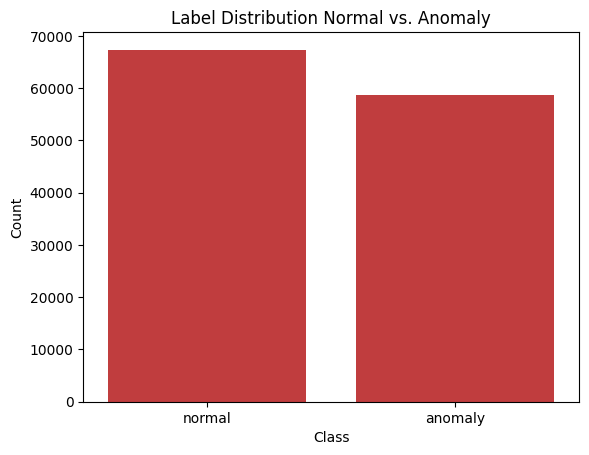

In [3]:
sns.countplot(x=df["label"],color='tab:red')
plt.title("Label Distribution Normal vs. Anomaly")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()
# shows the imbalance between normal and anomaly

# Dropping label column for corelation of numerics

In [4]:
numeric_df = df.drop("label",axis =1)
correla = numeric_df.corr()

# Feature Corealtion Heatmap

Text(0.5, 1.0, 'Feature Corealtion Heatmap')

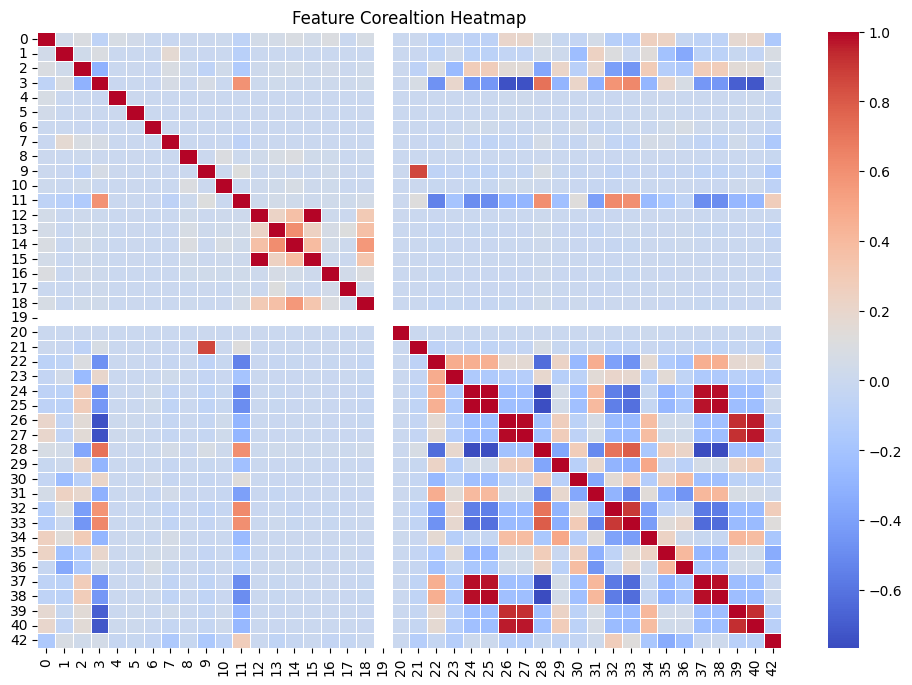

In [5]:
plt.figure(figsize=(12,8))
sns.heatmap(correla,cmap='coolwarm',linewidths=0.5)
plt.title("Feature Corealtion Heatmap")

# Duration of bytes

In [6]:
print(df.columns)

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', 'label', '42'],
      dtype='object')


In [7]:
df.columns = [int(col)if col.isdigit()else col for col in df.columns]

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,33,34,35,36,37,38,39,40,label,42
0,0,1,20,9,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,2,44,9,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,1,49,5,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly,19
3,0,1,24,9,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,1,24,9,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


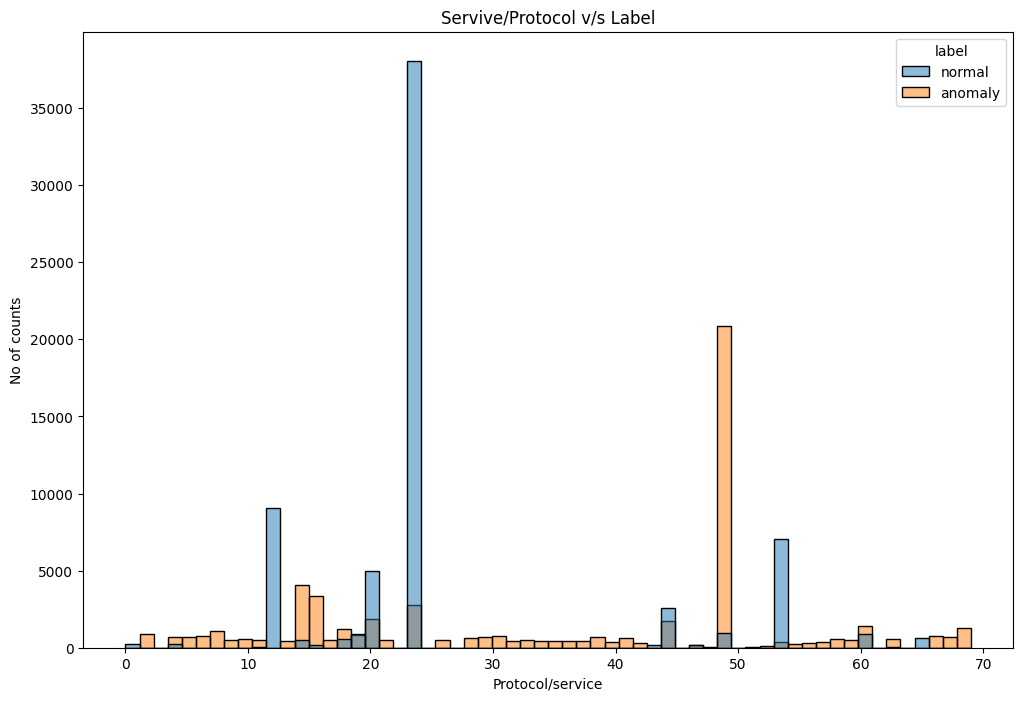

In [9]:
plt.figure(figsize=(12,8))
sns.histplot(data = df, x=df[2],hue='label')
plt.title("Servive/Protocol v/s Label")
plt.xlabel("Protocol/service")
plt.ylabel("No of counts")
plt.show()

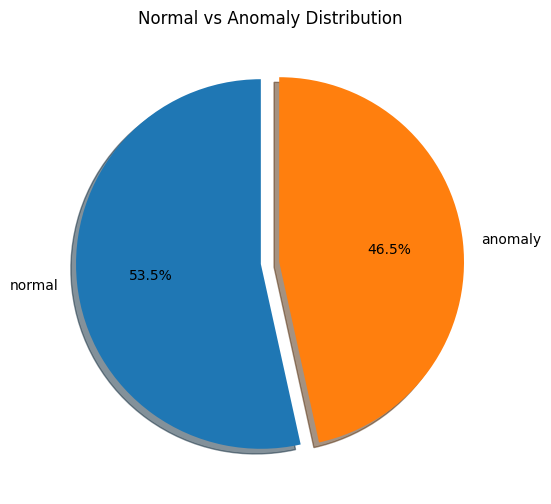

In [10]:
import matplotlib.pyplot as plt

label_counts = df['label'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(label_counts, labels=label_counts.index,  # type: ignore
        autopct='%1.1f%%', 
        startangle=90, 
        explode=[0.05]*len(label_counts),  
        shadow=True) 
plt.title('Normal vs Anomaly Distribution')
plt.show()


In [11]:
41 in df.columns

False

In [12]:
df['label'].head(50)

0      normal
1      normal
2     anomaly
3      normal
4      normal
5     anomaly
6     anomaly
7     anomaly
8     anomaly
9     anomaly
10    anomaly
11    anomaly
12     normal
13    anomaly
14    anomaly
15    anomaly
16     normal
17    anomaly
18     normal
19     normal
20    anomaly
21    anomaly
22     normal
23     normal
24    anomaly
25     normal
26    anomaly
27     normal
28     normal
29     normal
30    anomaly
31    anomaly
32     normal
33    anomaly
34     normal
35     normal
36     normal
37    anomaly
38     normal
39    anomaly
40    anomaly
41    anomaly
42     normal
43     normal
44     normal
45    anomaly
46    anomaly
47     normal
48    anomaly
49    anomaly
Name: label, dtype: object

# Training the model

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [14]:
# drops the Target
X = df.drop(columns="label") 
# only selects the target
Y = df['label']

# encoding labels to 0,1
le = LabelEncoder()
y_en = le.fit_transform(Y)

# splitting the dataset

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y_en,test_size = 0.2,random_state = 42)

In [16]:
clf = RandomForestClassifier(n_estimators=100,random_state=42)
clf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [17]:
y_pred = clf.predict(X_test)

print("Accuracy:", accuracy_score(Y_test, y_pred)*100)
print("Classification Report:\n", classification_report(Y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(Y_test, y_pred))


Accuracy: 99.95634054375869
Classification Report:
               precision    recall  f1-score   support

     anomaly       1.00      1.00      1.00     11773
      normal       1.00      1.00      1.00     13422

    accuracy                           1.00     25195
   macro avg       1.00      1.00      1.00     25195
weighted avg       1.00      1.00      1.00     25195

Confusion Matrix:
 [[11766     7]
 [    4 13418]]


In [18]:
#joblib.dump(clf,"Network_Anomility.joblib")

In [19]:
# anomaly_row = df[df['label'] == 'anomaly'].iloc[0].drop('label')


In [20]:
# normal_row = df[df['label'] == 'normal'].iloc[0].drop('label')


In [21]:
# print("Real Anomaly Prediction:", le.inverse_transform(clf.predict([anomaly_row])))
# print("Real Normal Prediction:", le.inverse_transform(clf.predict([normal_row])))


In [22]:
import openai

openai.api_base = "http://localhost:1234/v1"
openai.api_key = "lm-studio"

response = openai.ChatCompletion.create(
    model="local-model",
    messages=[
        {"role": "system", "content": "You are a helpful AI assistant."},
        {"role": "user", "content": "What is a SYN flood attack?"}
    ]
)

print(response['choices'][0]['message']['content'])


A SYN flood attack is an attempt by an attacker to send a large number of Syn packets (SYN/ACK pairs) to a target server at the same time in order to overload its network stack. This can lead to denial-of-service (DoS) conditions and slow down the performance of the server.
